In [1]:
pip install catboost

## Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

## Importing the CSV file

In [3]:
df = pd.read_csv('nasa.csv')
df.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## Looking for missing values and datatype

In [4]:
df.dropna(axis = 0,how = 'any',inplace = True)
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
for col in df.columns:
    print('Length of column'+" "+col+"=",len(df[col]))

Length of column Neo Reference ID= 4687
Length of column Name= 4687
Length of column Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Est Dia in M(min)= 4687
Length of column Est Dia in M(max)= 4687
Length of column Est Dia in Miles(min)= 4687
Length of column Est Dia in Miles(max)= 4687
Length of column Est Dia in Feet(min)= 4687
Length of column Est Dia in Feet(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Relative Velocity km per hr= 4687
Length of column Miles per hour= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Miss Dist.(lunar)= 4687
Length of column Miss Dist.(kilometers)= 4687
Length of column Miss Dist.(miles)= 4687
Length of column Orbiting Body= 4687
Length of column Orbit ID= 4687
Length of column Orbit Determination Date= 4687
Length of column Orb

## Dropping the useless features

In [7]:
df_new = df.drop(['Neo Reference ID',
                  'Est Dia in M(min)',
                  'Est Dia in M(max)', 
                  'Est Dia in Miles(min)', 
                  'Est Dia in Miles(max)', 
                  'Est Dia in Feet(min)', 
                  'Est Dia in Feet(max)', 
                  'Est Dia in KM(max)',
                  'Relative Velocity km per hr', 
                  'Miles per hour',
                  'Miss Dist.(Astronomical)', 
                  'Miss Dist.(lunar)', 
                  'Miss Dist.(miles)',
                  'Name',
                  'Close Approach Date', 
                  'Epoch Date Close Approach',
                  'Orbiting Body',
                  'Equinox', 
                  'Orbit Determination Date',
                  'Orbit ID',
                  'Orbit Uncertainity'],
                  axis=1) 
df_new.head(5)

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,6.115834,62753692.0,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,18.113985,57298148.0,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,7.590711,7622911.5,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,11.173874,42683616.0,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,9.840831,61010824.0,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


## Data Visualization

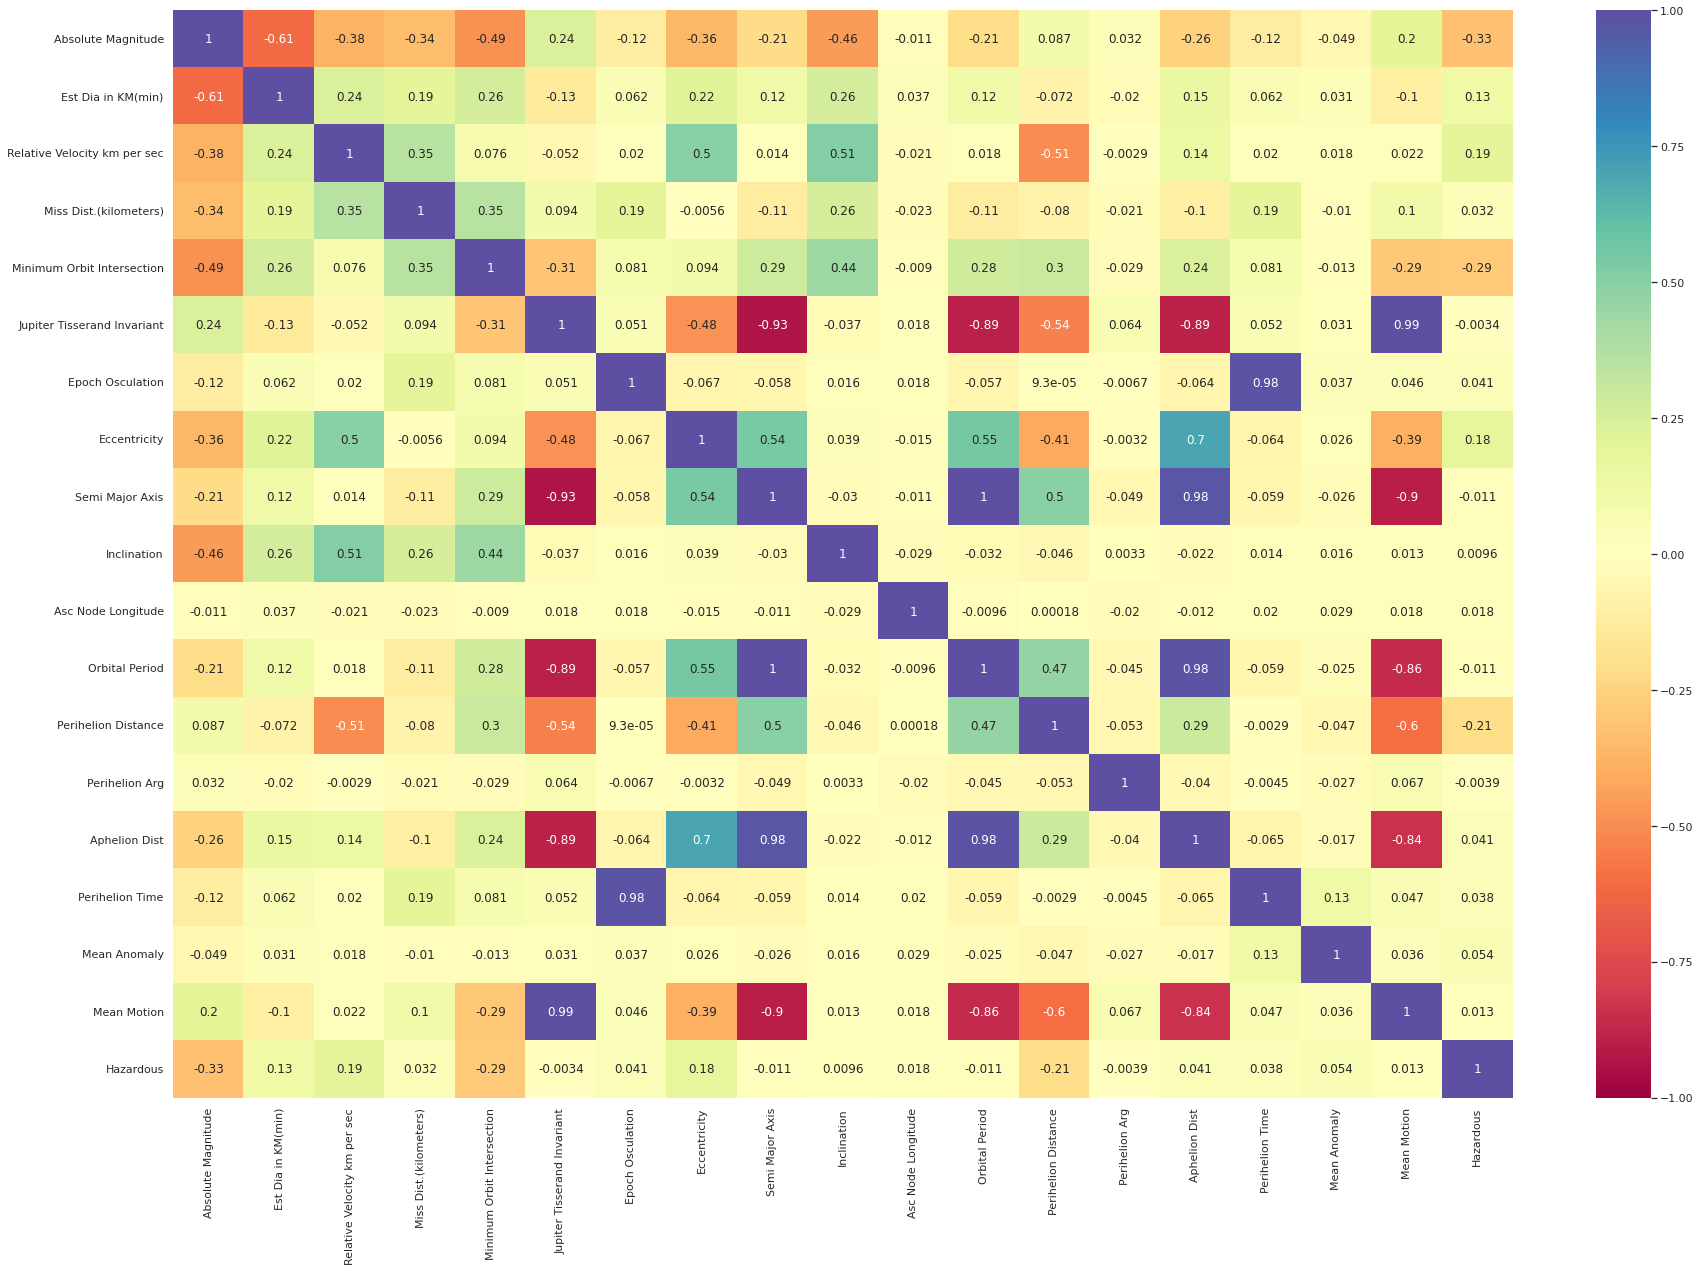

In [8]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

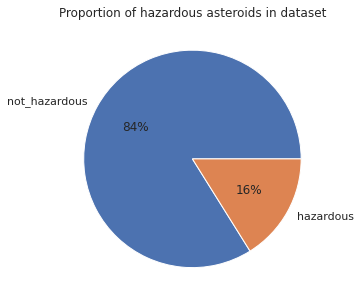

There are 755  potential asteroids that can collide and 3932 that might miss the collision .


In [9]:
hazardous =  df["Hazardous"].value_counts()[1]
not_hazardous = df["Hazardous"].value_counts()[0]
plt.figure(figsize=(5,5))
plt.pie(df["Hazardous"].value_counts().values,labels=['not_hazardous','hazardous'], autopct="%1.0f%%")
plt.title("Proportion of hazardous asteroids in dataset")
plt.show()
print("There are " + str(hazardous) + "  potential asteroids that can collide " 
      + "and " + str(not_hazardous) + " that might miss the collision .")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


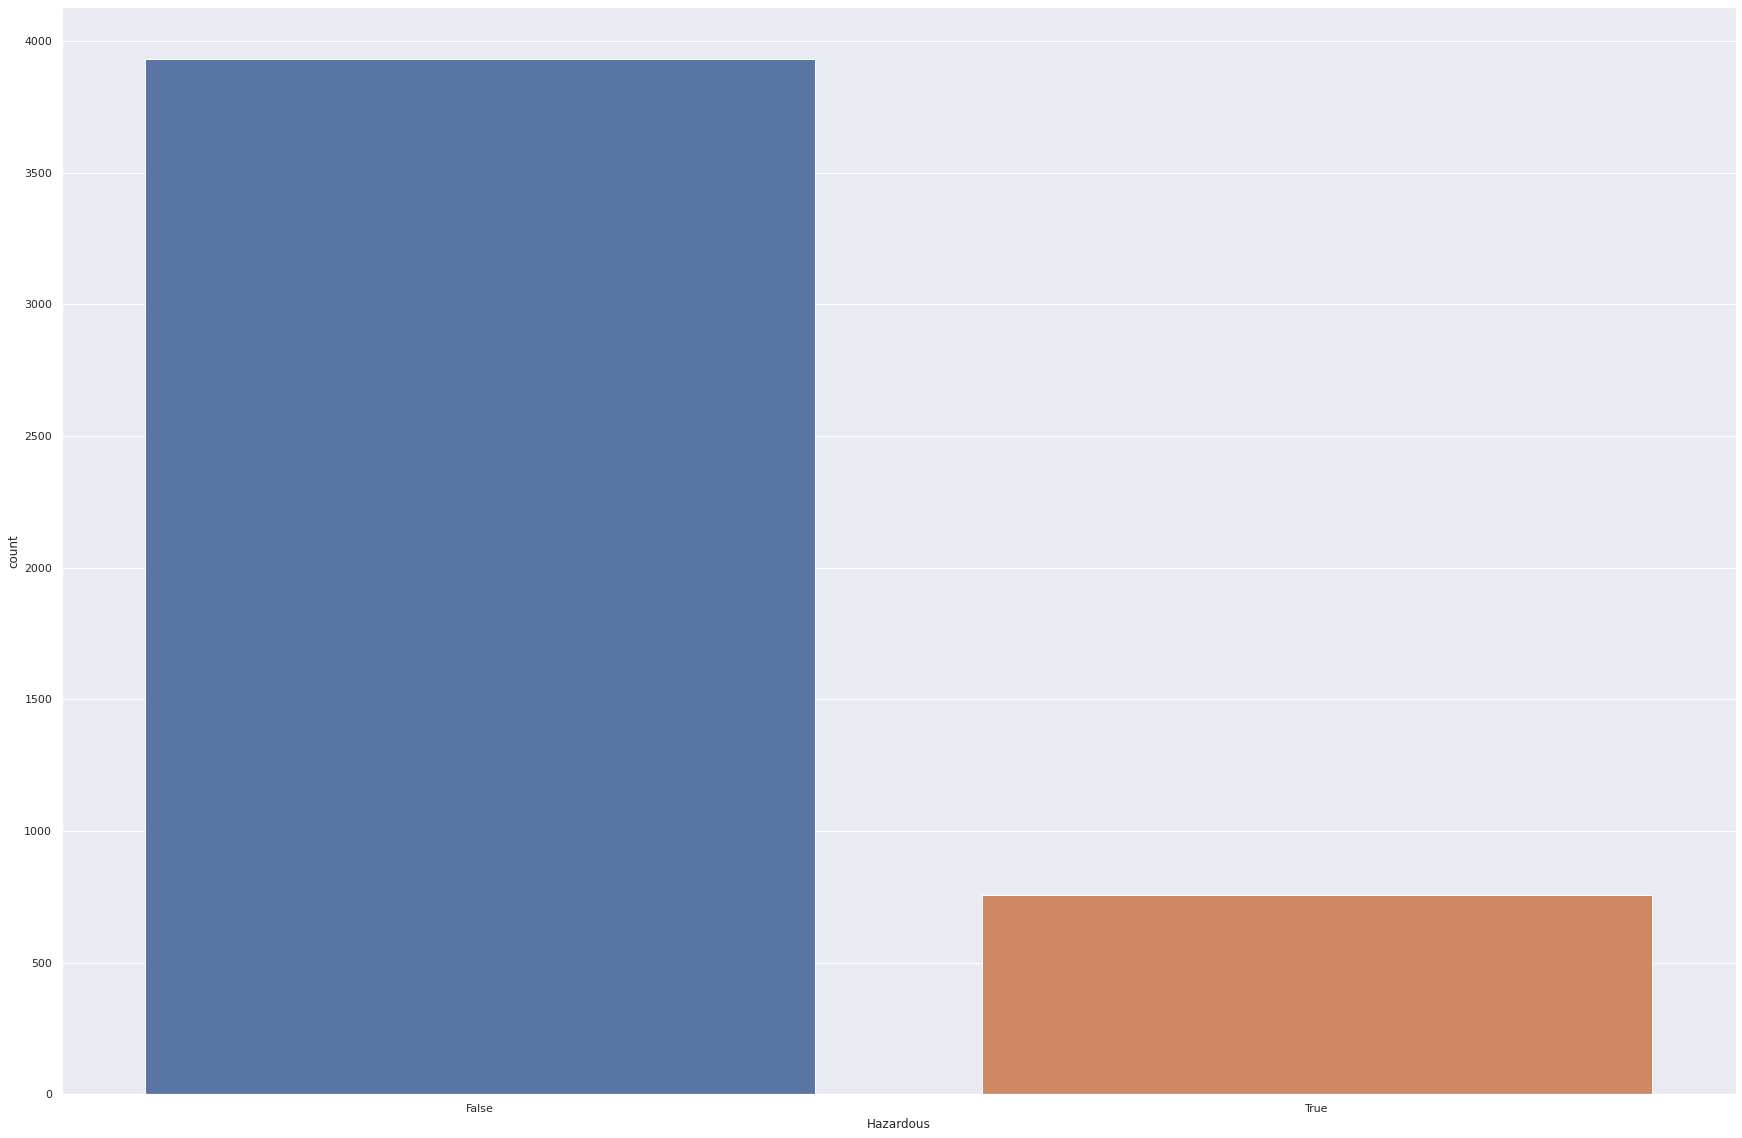

In [10]:
sns.countplot(df['Hazardous'])

## Assigning Features and Labels

In [11]:
y = df_new.iloc[:,-1].values
y.shape

(4687,)

In [12]:
X = df_new.iloc[:,:-1].values
X.shape


(4687, 18)

## Categorical Encoding

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 0 1 ... 0 0 0]


## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## XGB Classifier

In [16]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy of XGB Model is: {} %'.format(accuracy*100))

The accuracy of XGB Model is: 99.36034115138592 %


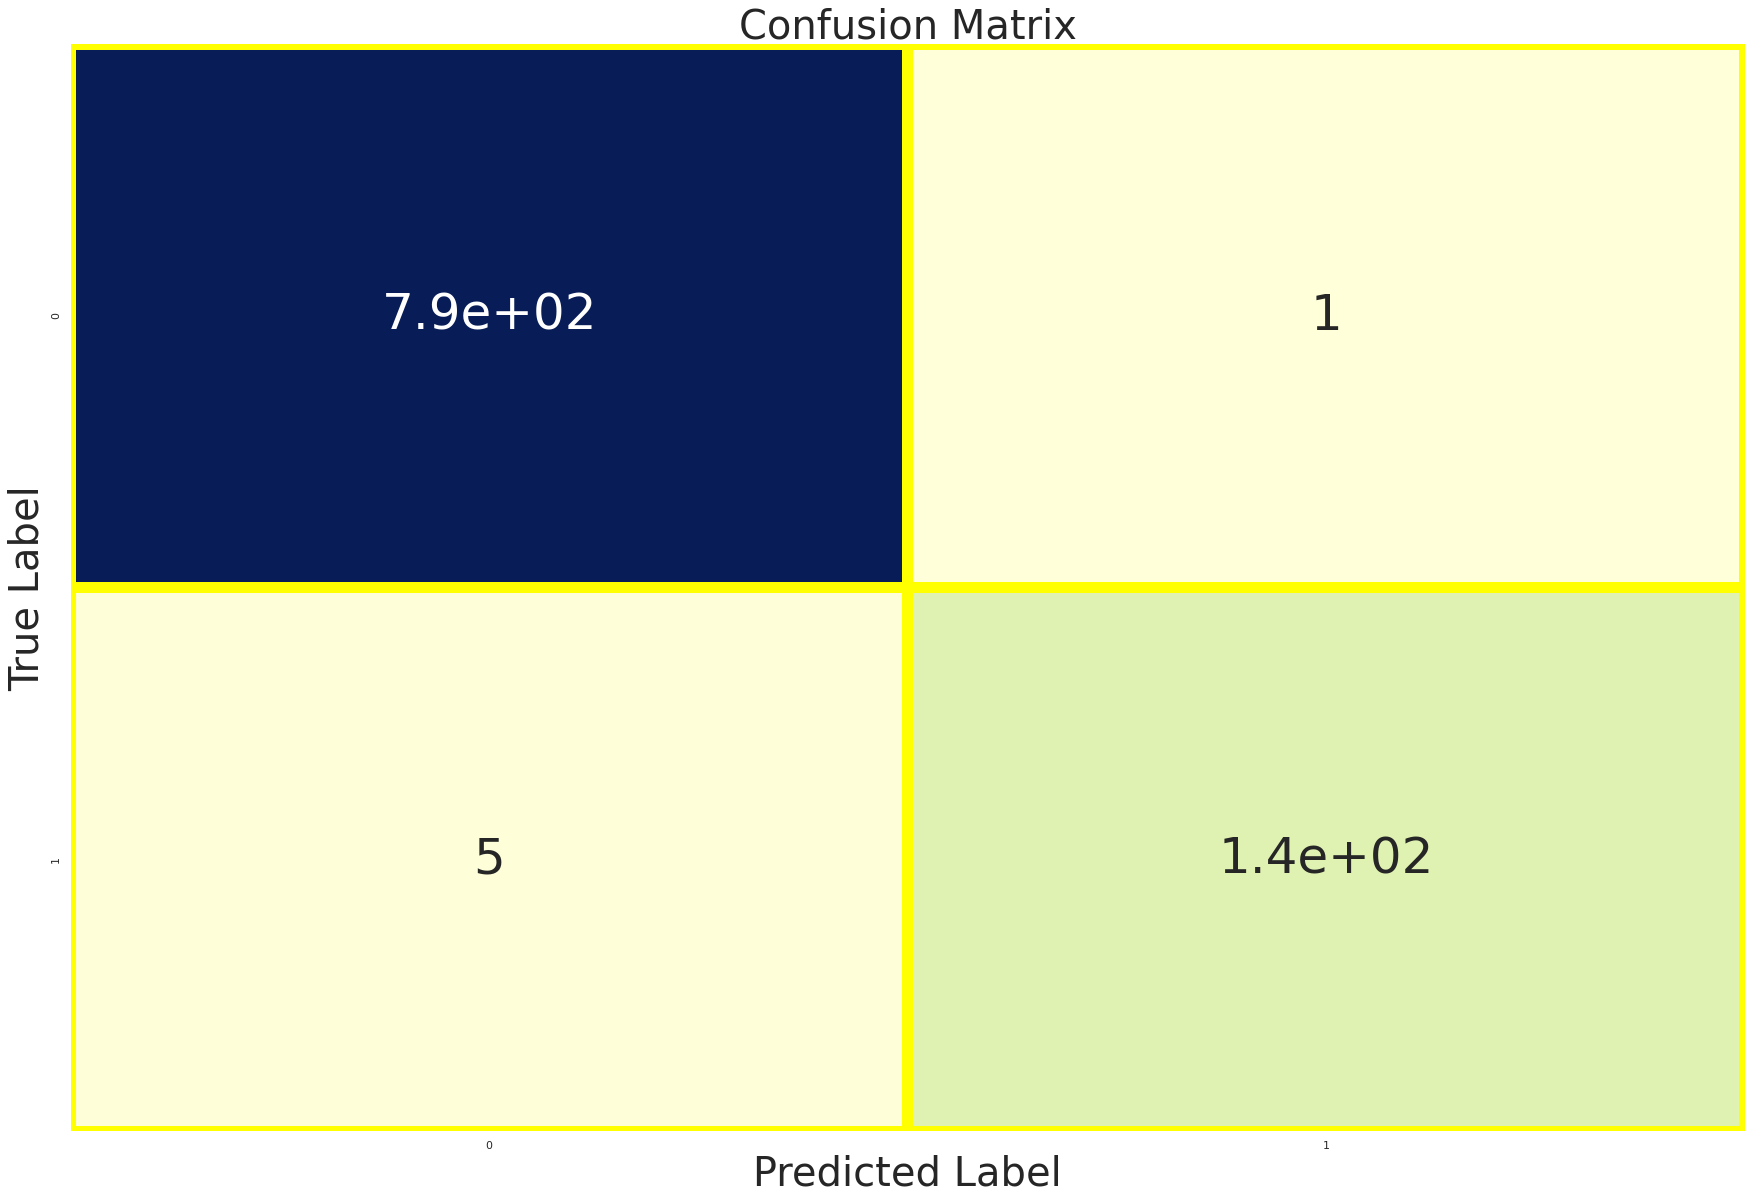

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            cbar=False,
            cmap = 'YlGnBu', 
            linecolor= 'yellow' , 
            linewidths= '10',
            annot_kws={'size': 50})
plt.ylabel('True Label',fontsize = 40)
plt.xlabel('Predicted Label',fontsize = 40)
plt.title('Confusion Matrix',fontsize = 40)
plt.show()

In [19]:
report = classification_report(y_test, y_pred)
print('The Classification report is as follows:\n\n{}'.format(report))

The Classification report is as follows:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       793
           1       0.99      0.97      0.98       145

    accuracy                           0.99       938
   macro avg       0.99      0.98      0.99       938
weighted avg       0.99      0.99      0.99       938



In [20]:
accuracies = cross_val_score(estimator = classifier, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
print("Accuracy of k-Fold Cross Validation is: {}%".format(accuracies.mean()*100))

Accuracy of k-Fold Cross Validation is: 99.54645276292335%


## Gradient Boost Classifier

In [21]:
classifier = GradientBoostingClassifier(loss='deviance',
                                        learning_rate=0.1,
                                        n_estimators=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy of Gradient Boost Classifier Model is: {} %'.format(accuracy*100))

The accuracy of Gradient Boost Classifier Model is: 99.36034115138592 %


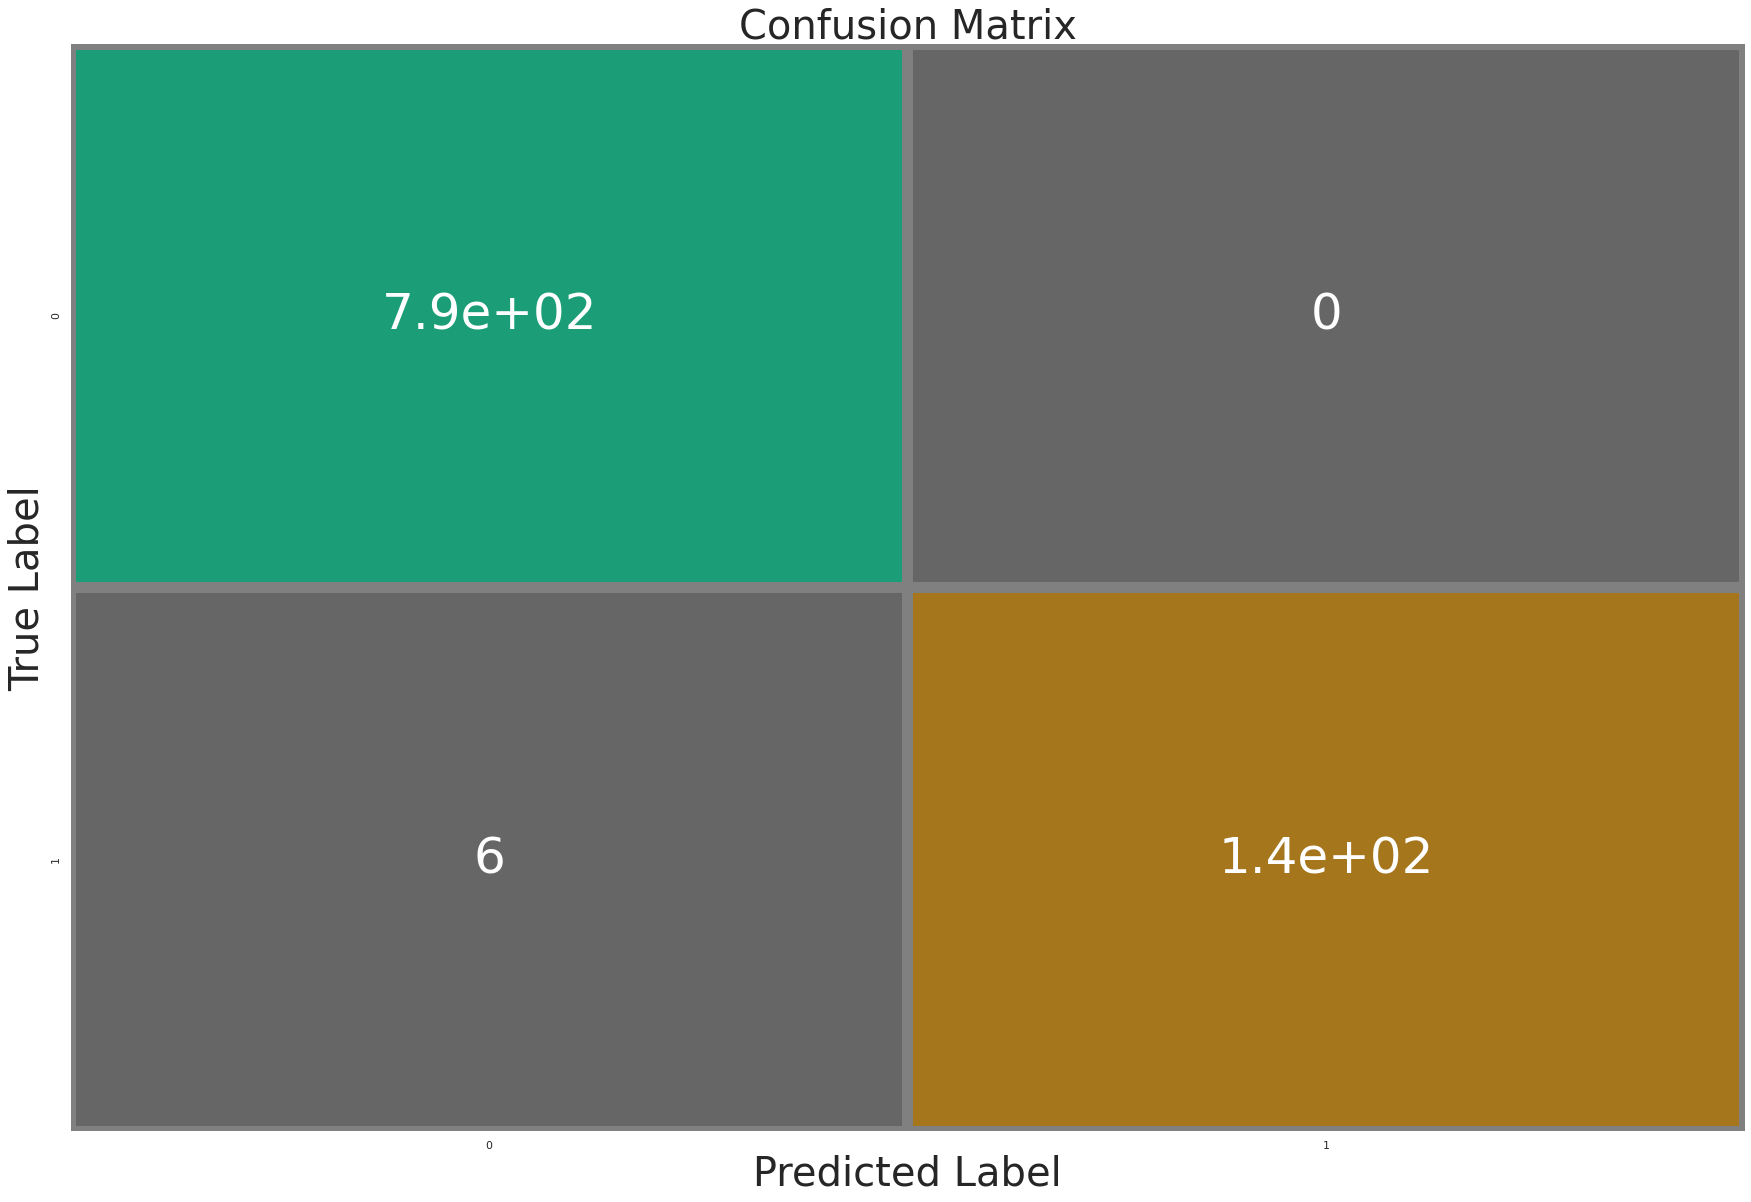

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            cbar=False,
            cmap = 'Dark2_r', 
            linecolor= 'grey' , 
            linewidths= '10',
            annot_kws={'size': 50})
plt.ylabel('True Label',fontsize = 40)
plt.xlabel('Predicted Label',fontsize = 40)
plt.title('Confusion Matrix',fontsize = 40)
plt.show()

In [24]:
report = classification_report(y_test, y_pred)
print('The Classification report is as follows:\n\n{}'.format(report))

The Classification report is as follows:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       793
           1       1.00      0.96      0.98       145

    accuracy                           0.99       938
   macro avg       1.00      0.98      0.99       938
weighted avg       0.99      0.99      0.99       938



In [25]:
accuracies = cross_val_score(estimator = classifier, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
print("Accuracy of k-Fold Cross Validation is: {}%".format(accuracies.mean()*100))

Accuracy of k-Fold Cross Validation is: 99.51985739750444%


## Ada Boost Classifier

In [26]:
classifier = AdaBoostClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy of Ada Boost Classifier Model is: {} %'.format(accuracy*100))

The accuracy of Ada Boost Classifier Model is: 99.46695095948827 %


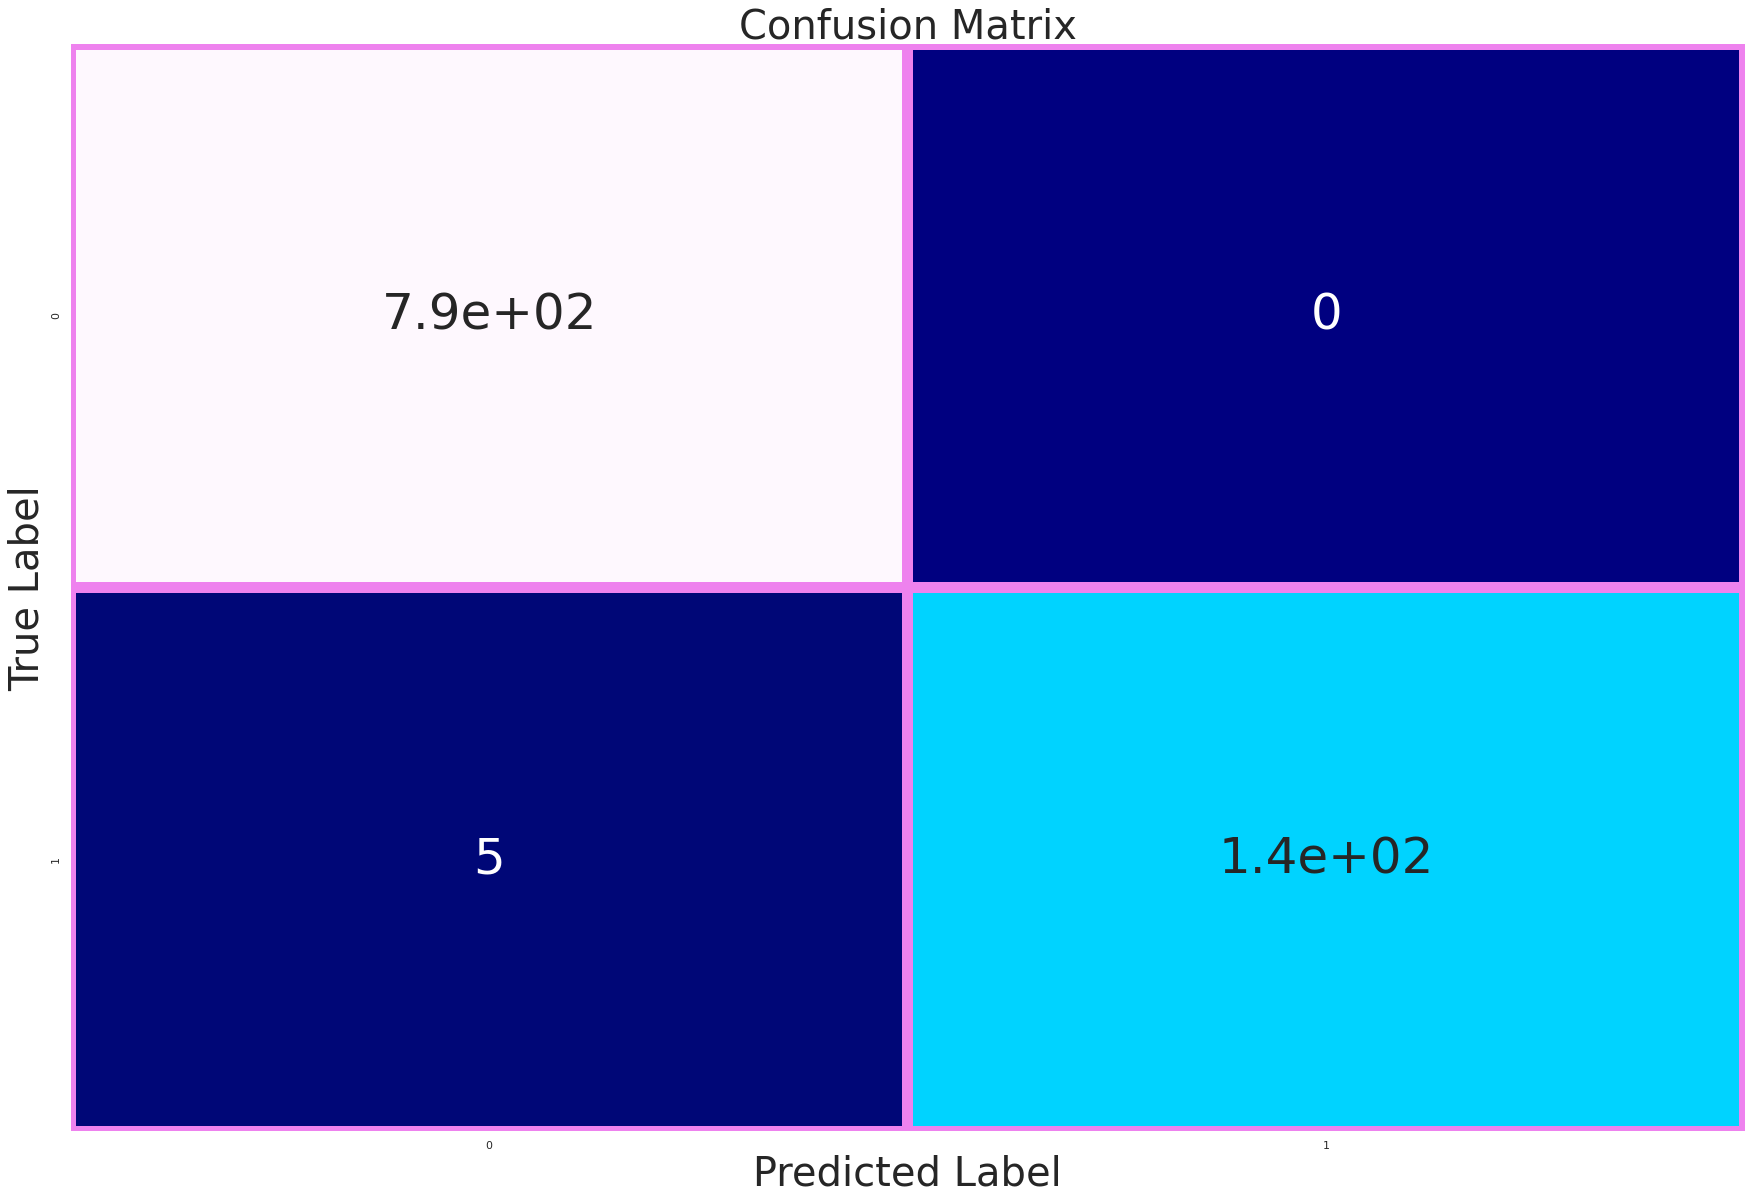

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            cbar=False,
            cmap = 'gist_ncar', 
            linecolor= 'violet' , 
            linewidths= '10',
            annot_kws={'size': 50})
plt.ylabel('True Label',fontsize = 40)
plt.xlabel('Predicted Label',fontsize = 40)
plt.title('Confusion Matrix',fontsize = 40)
plt.show()

In [29]:
report = classification_report(y_test, y_pred)
print('The Classification report is as follows:\n\n{}'.format(report))

The Classification report is as follows:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       793
           1       1.00      0.97      0.98       145

    accuracy                           0.99       938
   macro avg       1.00      0.98      0.99       938
weighted avg       0.99      0.99      0.99       938



In [30]:
accuracies = cross_val_score(estimator = classifier, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
print("Accuracy of k-Fold Cross Validation is: {}%".format(accuracies.mean()*100))

Accuracy of k-Fold Cross Validation is: 99.5731907308378%


## Random Forest

In [31]:
classifier = RandomForestClassifier(n_estimators = 10, 
                                    criterion = 'entropy', 
                                    random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [32]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy of Random Forest Classifier Model is: {} %'.format(accuracy*100))

The accuracy of Random Forest Classifier Model is: 99.36034115138592 %


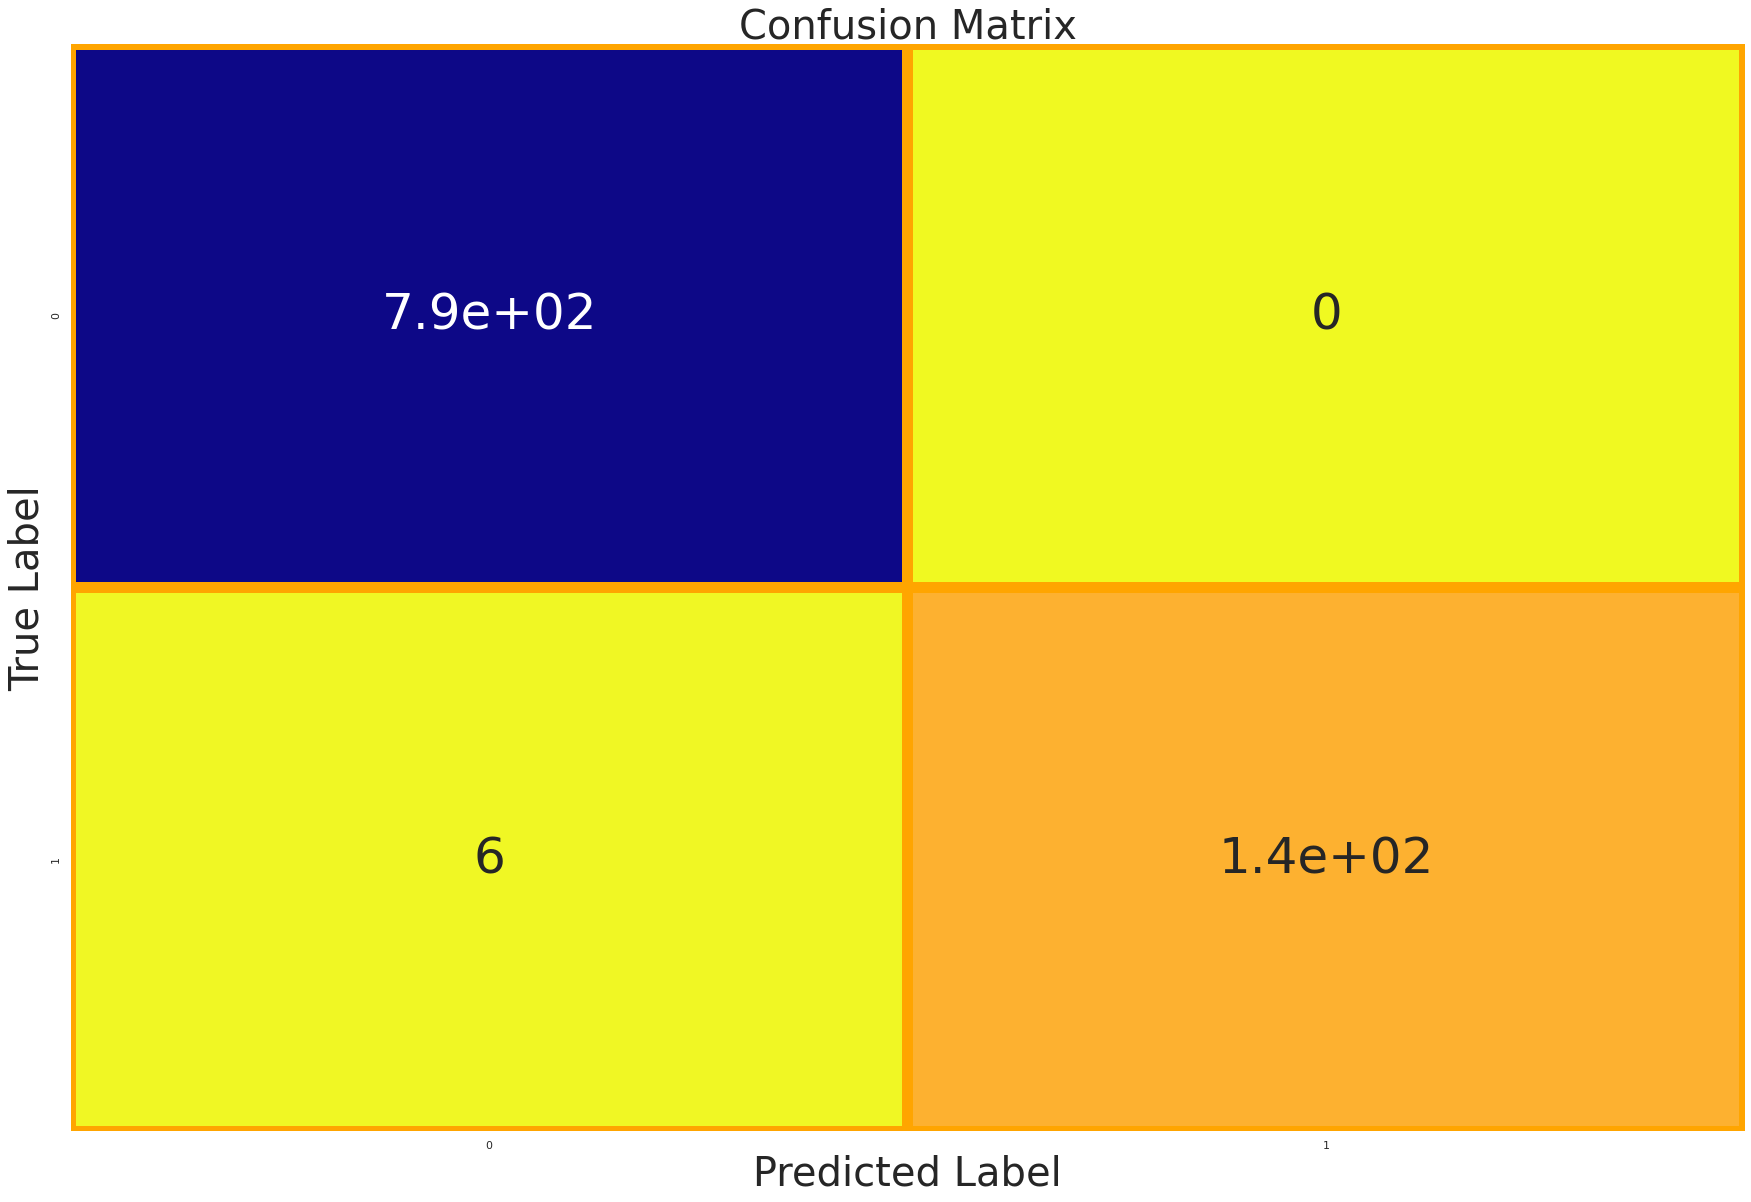

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            cbar=False,
            cmap = 'plasma_r', 
            linecolor= 'orange' , 
            linewidths= '10',
            annot_kws={'size': 50})
plt.ylabel('True Label',fontsize = 40)
plt.xlabel('Predicted Label',fontsize = 40)
plt.title('Confusion Matrix',fontsize = 40)
plt.show()

In [34]:
report = classification_report(y_test, y_pred)
print('The Classification report is as follows:\n\n{}'.format(report))

The Classification report is as follows:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       793
           1       1.00      0.96      0.98       145

    accuracy                           0.99       938
   macro avg       1.00      0.98      0.99       938
weighted avg       0.99      0.99      0.99       938



In [35]:
accuracies = cross_val_score(estimator = classifier, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
print("Accuracy of k-Fold Cross Validation is: {}%".format(accuracies.mean()*100))

Accuracy of k-Fold Cross Validation is: 99.5731907308378%
